# Iterated Prisoner's Dilemma
Prisoner's Dilemma is a pretty standard game that is commonly used in game theory (for a comprehensive defintion of Prisoner's dilemma see this [link](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma)). Iterated Prisoner's Dilemma is simply repeating the game and allowing the agents to choose again. Prisoner's Dilemma is implemented in a module I wrote called game_types. For an example using the PrisonersDilemma class see the pseudocode snippet below (I dicuss different types of strategies availiable in subsequent cells):
```python
from game_types import PrisonersDilemma
...
...
...
agent1 = Strategy() # Some Strategy for agent1
agent2 = Strategy() # Some Strategy for agent2
game = PrisonersDilemma(agent1, agent2) # Play Prisoners Dilemma with agent1 and agent2
num_iter = 10000 # Play the game 10000 times
game.play(num_iter)
data = game.data # grab data from game
```

## Scenario - TCP User's Game

In this scenario [Robert Brunner](http://www.astro.illinois.edu/people/bigdog) uploads a dataset and asks two graduate students [Edward](https://edwardjkim.github.io/) and [Will](http://publish.illinois.edu/wbiscarri/) to download and perform a variety of tasks. For the sake of simplicity in this game Edward and Will are the only ones on a special network and they recieve no interference from other people.

The traffic for this network is governed by the TCP Protocol and one feature of TCP is the backoff mechanism. If the rates that Edward and Will are sending packets to this network causes congestion they (`backoff` and) each reduce the rate for a while until network congestion subsides. This is the correct implementation. A defective implementation of TCP would be one that does not backoff if the network is congested. The users in this game have 2 choices. To Cooperate (use the correct implementation of the TCP protocol) or to defect (use an incorrect implementation of the TCP protocol).

The payoff matrix is below. The numbers in the box are the utility values. For this example the higher the utlity value the faster the dataset is downloaded. Will is the first player and is the first number in each box. Edward is the second player and is the the second number in each box. 

If Edward and Will follow the correct protocol they will both download the dataset in a reasonable amout of time (top left). If Will decides he wants the data faster and uses a defective TCP protocol while Edward still follows the correct protocol Will downloads the dataset much faster than Edward (Top Right). Vise-versa (bottom left). If they both defect they download the dataset significantly slower than if they both cooperated.
![Game Theory TCP Example](http://i.imgur.com/hfWBE27.png)

## Types of Strategies
Other Strategies are still available the only new strategy that has been implemented is Deep Q Learning. To see other avilable strategies see this [notebook](https://github.com/ikegwukc/INFO597-DeepLearning-GameTheory/blob/master/basicGames/Basic%20Games.ipynb)

### Deep Q-Learning
This implementation is done in tensorflow and and is based on this [paper](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf). 

```python
from strategies import machine_learning as ml
dl = ml.DeepQLearner(2, 1, decay=0.9, learning_rate=0.02)
agent = ml.QLearn(agent=dl)
```

In [1]:
# Importing Nesscary libs
%matplotlib inline
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Just Playing 1 Game Type
from game_types import PrisonersDilemma  


# strategies
from strategies import chaos as c
from strategies import defect as d
from strategies import machine_learning as ml
from strategies import pavlov as p
from strategies import grim as g

In [18]:
def plot(x, y, agentx_name, agenty_name, tick_labels=('1','2','4','5')):
    '''
    x: data from x column
    y: data from y column
    agentx_name:
    agenty_name:
    '''
    x_util = Counter(x)
    y_util = Counter(y)
    
    x_tot, y_tot = sum(x), sum(y)
    x1, y1, x2, y2 = [], [], [], []
    for i, j in zip(x, y):
        x1.append(i); y1.append(x[i])
        x2.append(j); y2.append(y[j])
    fig, ax = plt.subplots(figsize=(12,6))
    width=0.35
    
    a1 = ax.bar(x1, y1, width)
    a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')
    
    ax.set_title('{0} Vs {1}'.format(agentx_name, agenty_name))
    ax.set_ylabel('Number of Games')
    ax.set_xlabel('Utility Values')
    ax.set_xticks(np.add([1,2,5],width-.05))
    ax.set_xticklabels(('1', '2', '4', '5'))
    ax.legend((a1[0], a2[0]), ('{0}\nTotal Utility Score: {1}'.format(agentx_name, str(x_tot)),
                           '{0}\nTotal Utility Score: {1}'.format(agenty_name, str(y_tot))), loc=1, bbox_to_anchor=(1.35, 1))


# Deep Q Learning Vs Q Learning (Short Game)

INFO:tensorflow:Summary name MLP/MLP_input_layer/W_0:0 is illegal; using MLP/MLP_input_layer/W_0_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/W_0:0/gradients is illegal; using MLP/MLP_input_layer/W_0_0/gradients instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/b:0 is illegal; using MLP/MLP_input_layer/b_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/b:0/gradients is illegal; using MLP/MLP_input_layer/b_0/gradients instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer_copy/W_0:0 is illegal; using MLP/MLP_input_layer_copy/W_0_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer_copy/b:0 is illegal; using MLP/MLP_input_layer_copy/b_0 instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Playing Game: 100%|██████████| 1000/1000 [00:00<00:00, 2045.68it/s]


<bound method DeepQLearner.__del__ of <strategies.machine_learning.DeepQLearner object at 0x122d6f6d8>>

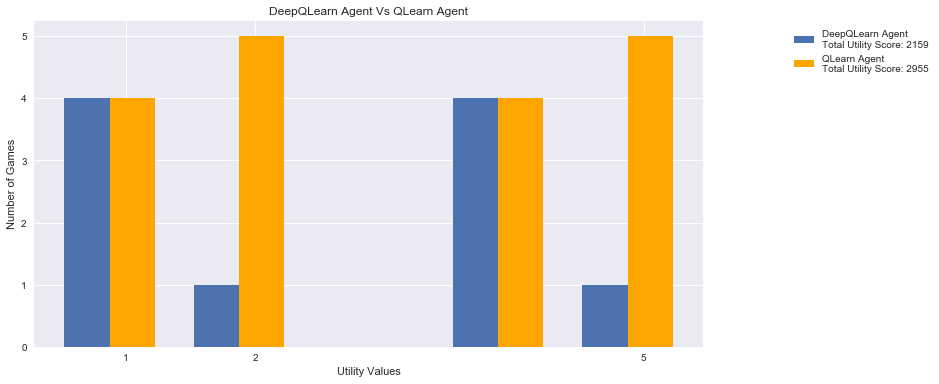

In [21]:
tf.reset_default_graph()
dl=ml.DeepQLearner(2, 1, decay=0.9, learning_rate=0.02)
agent1 = ml.QLearn(agent=dl)
agent2 = ml.QLearn()
game = PrisonersDilemma(agent1, agent2)
game.play(1000)
plot(game.data['A'], game.data['B'], 'DeepQLearn Agent', 'QLearn Agent')
dl.__del__

# Deep Q Learning Vs Q Learning (Long Game)

INFO:tensorflow:Summary name MLP/MLP_input_layer/W_0:0 is illegal; using MLP/MLP_input_layer/W_0_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/W_0:0/gradients is illegal; using MLP/MLP_input_layer/W_0_0/gradients instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/b:0 is illegal; using MLP/MLP_input_layer/b_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer/b:0/gradients is illegal; using MLP/MLP_input_layer/b_0/gradients instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer_copy/W_0:0 is illegal; using MLP/MLP_input_layer_copy/W_0_0 instead.
INFO:tensorflow:Summary name MLP/MLP_input_layer_copy/b:0 is illegal; using MLP/MLP_input_layer_copy/b_0 instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Playing Game: 100%|██████████| 100000/100000 [01:31<00:00, 1095.17it/s]


<bound method DeepQLearner.__del__ of <strategies.machine_learning.DeepQLearner object at 0x123056710>>

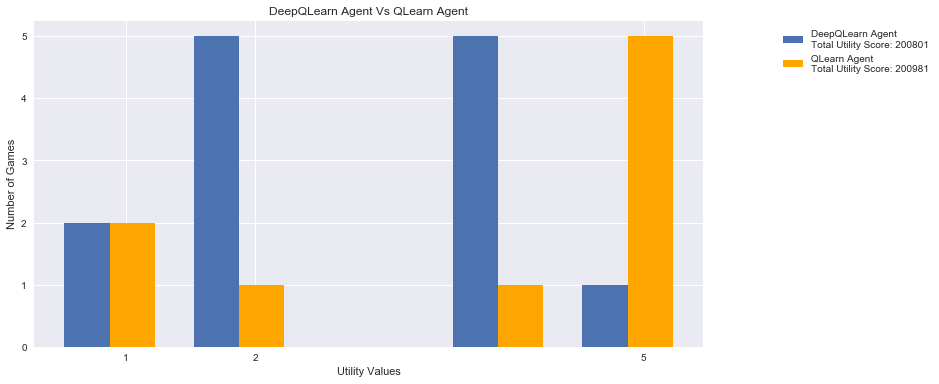

In [22]:
tf.reset_default_graph()
dl=ml.DeepQLearner(2, 1, decay=0.9, learning_rate=0.02)
agent1 = ml.QLearn(agent=dl)
agent2 = ml.QLearn()
game = PrisonersDilemma(agent1, agent2)
game.play(100000)
plot(game.data['A'], game.data['B'], 'DeepQLearn Agent', 'QLearn Agent')
dl.__del__